In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

In [2]:
# Load the dataset
url = "airbnb_listing_train.csv"
df = pd.read_csv(url)

In [3]:
# Explore the dataset
print(df.head())
print(df.info())
print(df.describe())

         id                                             name    host_id  \
0  11602914              Luxury home 100m2+garden in center!    3123809   
1  13289321                      East is where your home is!   10259430   
2  40779315  Amsterdam Central - LUXURY house in BUSY STREET  224969266   
3   7820311                       great appartment down town     693472   
4  27346603    Private room with canal view in peaceful area   41888346   

   host_name  neighbourhood_group            neighbourhood  latitude  \
0  Marjolein                  NaN  De Pijp - Rivierenbuurt  52.35368   
1        Ana                  NaN                 Oud-Oost  52.35728   
2       Mark                  NaN             Centrum-West  52.37582   
3      Ayden                  NaN               Westerpark  52.37792   
4     Alissa                  NaN               Westerpark  52.38051   

   longitude        room_type  minimum_nights  number_of_reviews last_review  \
0    4.90177  Entire home/apt       

In [4]:
# Check for missing values
print(df.isnull().sum())

id                                    0
name                                 22
host_id                               0
host_name                             8
neighbourhood_group               12901
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
minimum_nights                        0
number_of_reviews                     0
last_review                        1596
reviews_per_month                  1596
calculated_host_listings_count        0
availability_365                      0
price                                 0
dtype: int64


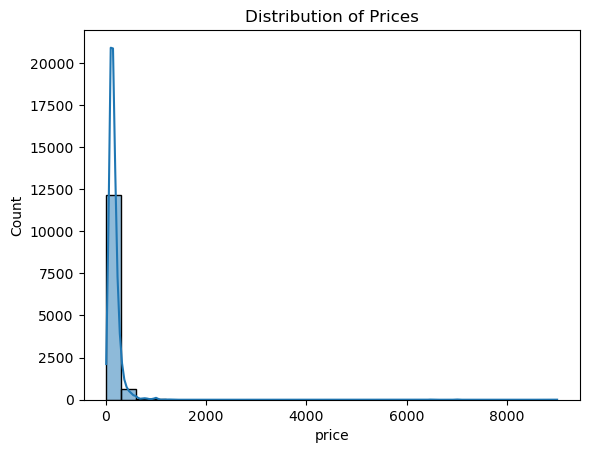

In [5]:
# Visualize the data
sns.histplot(df['price'], bins=30, kde=True)
plt.title('Distribution of Prices')
plt.show()

In [6]:
# Data preprocessing
# Drop unnecessary columns (if any)
df = df.drop(['id', 'name', 'host_name', 'last_review'], axis=1)

In [7]:
# Split the data into features and target variable
X = df.drop('price', axis=1)
y = df['price']

In [8]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
# Define preprocessing steps
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

In [10]:

# Define preprocessing steps
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])


In [11]:
# Create a pipeline with preprocessing and the model
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

In [12]:
# Train the model
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['host_id', 'neighbourhood_group', 'latitude', 'longitude',
       'minimum_nights', 'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['neighbourhood', 'room_type'], dtype='object'))])),
                ('regressor', LinearRegression())])

In [13]:
# Make predictions on the test set
y_pred = model.predict(X_test)

In [14]:

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [15]:
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')


Mean Squared Error: 46984.95728586557
R-squared: 0.04392139364164327
